This tutorial is Part 2 of an introduction to social network analysis in Python. It covers how to sample and visualize network data. The primary example used for replication is Adamic and Glance's (2005) paper on relationships between political blogs ahead of the 2004 election. The paper is available here and is the source of all figures included below. We use the GML file available [here](http://www.thomaspadilla.org/data/network/polblogs/polblogs.gml) or [here](http://www-personal.umich.edu/~mejn/netdata/) ([documentation](http://www.thomaspadilla.org/data/network/polblogs/polblogs.txt)).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-external-data-files" data-toc-modified-id="Importing-external-data-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing external data files</a></span></li><li><span><a href="#Downsampling-graphs" data-toc-modified-id="Downsampling-graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Downsampling graphs</a></span><ul class="toc-item"><li><span><a href="#Snowball-sample" data-toc-modified-id="Snowball-sample-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Snowball sample</a></span><ul class="toc-item"><li><span><a href="#Snowball-sampling-with-single-source-shortest-paths" data-toc-modified-id="Snowball-sampling-with-single-source-shortest-paths-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Snowball sampling with single-source-shortest-paths</a></span></li><li><span><a href="#Snowball-sampling-with-breadth-first-search" data-toc-modified-id="Snowball-sampling-with-breadth-first-search-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Snowball sampling with breadth-first search</a></span></li></ul></li><li><span><a href="#Node-and-edge-samples" data-toc-modified-id="Node-and-edge-samples-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Node and edge samples</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Graph-Layouts" data-toc-modified-id="Graph-Layouts-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Graph Layouts</a></span><ul class="toc-item"><li><span><a href="#Default-(spring)-layout" data-toc-modified-id="Default-(spring)-layout-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Default (spring) layout</a></span></li><li><span><a href="#Random-layout" data-toc-modified-id="Random-layout-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Random layout</a></span></li><li><span><a href="#Kamada-Kawai-(force-directed)-layout" data-toc-modified-id="Kamada-Kawai-(force-directed)-layout-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Kamada-Kawai (force-directed) layout</a></span></li><li><span><a href="#Layouts-overview" data-toc-modified-id="Layouts-overview-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Layouts overview</a></span></li><li><span><a href="#Tuning-graph-layouts" data-toc-modified-id="Tuning-graph-layouts-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Tuning graph layouts</a></span></li></ul></li><li><span><a href="#Styling-the-plot-aesthetic" data-toc-modified-id="Styling-the-plot-aesthetic-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Styling the plot aesthetic</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-default" data-toc-modified-id="Plotting-the-default-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plotting the default</a></span></li><li><span><a href="#Change-sizes-of-nodes,-edges,-or-arrows" data-toc-modified-id="Change-sizes-of-nodes,-edges,-or-arrows-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Change sizes of nodes, edges, or arrows</a></span></li><li><span><a href="#Change-colors-of-nodes-or-edges" data-toc-modified-id="Change-colors-of-nodes-or-edges-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Change colors of nodes or edges</a></span></li><li><span><a href="#Change-styling-of-nodes-or-arrows" data-toc-modified-id="Change-styling-of-nodes-or-arrows-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Change styling of nodes or arrows</a></span></li><li><span><a href="#Turn-plot-features-on-and-off" data-toc-modified-id="Turn-plot-features-on-and-off-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Turn plot features on and off</a></span></li><li><span><a href="#Adding-text" data-toc-modified-id="Adding-text-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Adding text</a></span></li></ul></li><li><span><a href="#Drawing-attention-to-selected-features" data-toc-modified-id="Drawing-attention-to-selected-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Drawing attention to selected features</a></span><ul class="toc-item"><li><span><a href="#Drawing-selected-nodes" data-toc-modified-id="Drawing-selected-nodes-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Drawing selected nodes</a></span></li><li><span><a href="#Drawing-selected-node-labels" data-toc-modified-id="Drawing-selected-node-labels-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Drawing selected node labels</a></span></li><li><span><a href="#Drawing-selected-edges" data-toc-modified-id="Drawing-selected-edges-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Drawing selected edges</a></span></li><li><span><a href="#Drawing-selected-edge-labels" data-toc-modified-id="Drawing-selected-edge-labels-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Drawing selected edge labels</a></span></li></ul></li><li><span><a href="#Illustrating-discrete-attributes" data-toc-modified-id="Illustrating-discrete-attributes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Illustrating discrete attributes</a></span><ul class="toc-item"><li><span><a href="#Coloring-nodes-by-label" data-toc-modified-id="Coloring-nodes-by-label-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Coloring nodes by label</a></span></li><li><span><a href="#Coloring-edges-by-node-label" data-toc-modified-id="Coloring-edges-by-node-label-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Coloring edges by node label</a></span></li></ul></li><li><span><a href="#Illustrating-continuous-attributes" data-toc-modified-id="Illustrating-continuous-attributes-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Illustrating continuous attributes</a></span><ul class="toc-item"><li><span><a href="#Sizing-nodes-by-value" data-toc-modified-id="Sizing-nodes-by-value-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Sizing nodes by value</a></span><ul class="toc-item"><li><span><a href="#Degree" data-toc-modified-id="Degree-3.5.1.1"><span class="toc-item-num">3.5.1.1&nbsp;&nbsp;</span>Degree</a></span></li><li><span><a href="#Pagerank" data-toc-modified-id="Pagerank-3.5.1.2"><span class="toc-item-num">3.5.1.2&nbsp;&nbsp;</span>Pagerank</a></span></li></ul></li><li><span><a href="#Coloring-nodes-by-value" data-toc-modified-id="Coloring-nodes-by-value-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Coloring nodes by value</a></span></li><li><span><a href="#Sizing-edges-by-value" data-toc-modified-id="Sizing-edges-by-value-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Sizing edges by value</a></span></li><li><span><a href="#Degree-histogram" data-toc-modified-id="Degree-histogram-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Degree histogram</a></span></li></ul></li></ul></li></ul></div>

Let's get started! First, we need to import all of the packages we'll use to do our analysis.

In [1]:
import pandas as pd               # For analyzing tabular data
import numpy as np                # For working with arrays and numerical operations
import networkx as nx             # For network data specifically
from networkx.drawing.nx_agraph import graphviz_layout  # ...and graphing network data
import matplotlib.pyplot as plt   # For making plots
from pyvis import network as pv   # For making interactive plots
import random                     # For generating random numbers

%matplotlib inline     

# Importing external data files

We will be using a dataset from Adamic and Glance's (2005) paper: _The political blogosphere and the 2004 US election: Divided they blog._

The paper built a dataset of political blogs as follows:
- They compiled a list of important blogs from blog curation sites (e.g. BlogCatalog).
- They crawled the front pages of these blogs and got all other linked blogs on these pages.
- If the other blog had at least 17 citations in the dataset, they kept it and got its links.
- They labeled the political orientation of the blogs using the blog curation sites and their own inspections.
    
    
The final dataset had:

- 759 liberal blogs
- 735 conservative blogs

Key findings from this analysis:

> "91% of  links originating within either the conservative or liberal communities stay within that community...Conservative blogs show a greater tendency to link."

Reference: https://networkx.github.io/documentation/stable/reference/readwrite/index.html

First, let's practice importing files from external data sources. There are many different formats for disseminating network data, but some helpful ones supported by NetworkX include:
```python
nx.read_gml(filepath)                        # GML

nx.read_edgelist(filepath, delimiter=',')    # A delimited edgelist

nx.from_pandas_edgelist(df)                  # Pandas dataframe in edge list format
nx.from_pandas_adjacency(df)                 # Pandas dataframe in adjacency matrix format
```

We'll get started with the dataset of blog links.

<span style="color:orange"><b>Note:</b> Because some edges are duplicated, we had to modify the original file by adding a line to indicate that it is a multigraph. So, the dataset on this server is not perfectly identical to the original. </div>

In [2]:
# Let's use NetworkX's read_gml to bring in the raw data file
G = nx.read_gml("data/polblogs.gml")
G

In [3]:
# As discussed, note that the graph above is a multigraph
# Let's now convert it from a multigraph to a directed graph
P = nx.DiGraph(G)

In [4]:
# And, we inspect
print(nx.info(P))

Name: 
Type: DiGraph
Number of nodes: 1490
Number of edges: 19025
Average in degree:  12.7685
Average out degree:  12.7685


The dataset does not seem to be a perfect match for the paper. For example, we have 1940 links while they had 1494. But, it's close. We can also confirm that our degree counts roughly match those reported for Daily Kos (338), Eschelon (264), and Instapundit (277).

In [5]:
# Code to get all blog names containing a given keyword: [i for i in list(P.nodes) if 'instapundit' in i]

# Let's check if individual blog degrees match:
P.in_degree(['dailykos.com', 'atrios.blogspot.com', 'instapundit.com'])

InDegreeView({'dailykos.com': 337, 'atrios.blogspot.com': 263, 'instapundit.com': 276})

# Downsampling graphs

We can see that the graph is (relatively) large and pretty well-connected: 1490 nodes and 19,025 edges. This is not actually "large" by network standards (Facebook has 1.7 billion users) but on my computer the plots are still running slow.

Since we will be making _many_ plots, and since it's generally helpful for large graphs, let's learn to downsample. I will demonstrate two different approaches.

## Snowball sample

One common method for sampling graphs is _snowball sampling_. The basic idea is as follows:

1. Start with set of seed nodes.
2. Add any friends of the seed nodes.
2. Add any friends of the friends of the seed nodes.
2. Add any friends of the friends of the (friends of the...) seed nodes.

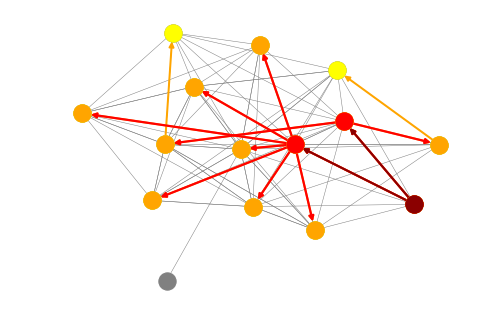

In [6]:
source = "matthewyglesias.com"
p = nx.single_source_shortest_path(P,source,cutoff=2)

sample = list(p.keys())
Q = P.subgraph(sample)

T1 = nx.bfs_tree(Q, source = 'thewashingtonnote.com', depth_limit=1 )
T2 = nx.bfs_tree(Q, source = 'thewashingtonnote.com', depth_limit=2 )
T3 = nx.bfs_tree(Q, source = 'thewashingtonnote.com', depth_limit=3 )

pos = nx.kamada_kawai_layout(Q)

nx.draw(Q, pos=pos, arrows=False, edge_color='grey', width=0.5, node_color='grey')

nx.draw_networkx_nodes(Q, pos=pos, nodelist = T3.nodes, node_color='yellow')
nx.draw_networkx_edges(Q, pos=pos, edgelist = T3.edges, edge_color='orange', width=2)
nx.draw_networkx_nodes(Q, pos=pos, nodelist = T2.nodes, node_color='orange')
nx.draw_networkx_edges(Q, pos=pos, edgelist = T2.edges, edge_color='red', width=2.2)
nx.draw_networkx_nodes(Q, pos=pos, nodelist = T1.nodes, node_color='red')
nx.draw_networkx_edges(Q, pos=pos, edgelist = T1.edges, edge_color='darkred', width=2)
nx.draw_networkx_nodes(Q, pos=pos, nodelist = ['thewashingtonnote.com'], node_color='darkred')

plt.show()

We will use a few helper functions, including some from Python's `random` package:
    
```python
nx.single_source_shortest_path(G, source, cutoff=n)  # Get all shortest paths from source node within distance n
nx.bfs_tree(G, source, depth_limit=n )               # Conduct a breadth-first search of depth n

S = G.subgraph(...)       # Select a subgraph

random.seed(n)            # Set a "seed" for the random number generator. This ensures that your code is replicable.
random.sample([...], n)   # Choose n items from a list of items
```

### Snowball sampling with single-source-shortest-paths

Actually, last week we learned an algorithmic approach to implementing this with NetworkX. Remember that we had a function, `single_source_shortest_path`, that would give a list of all shortest paths from a source node. Well, that function takes an optional argument, `cutoff`, that limits the maximum length of the shortest paths returned.

This can help us find our sample: we start from our source node, and then walk away in all directions until we hit the cutoff.

Let's try this for the blogger Matt Yglesias.

In [7]:
# Let's make him the path
source = "matthewyglesias.com"

# Let's find what other nodes can be reached in two steps or less
paths = nx.single_source_shortest_path(P,source,cutoff=2)

# Our sample will be all of these nodes
sample = list(paths.keys())
len(sample)

15

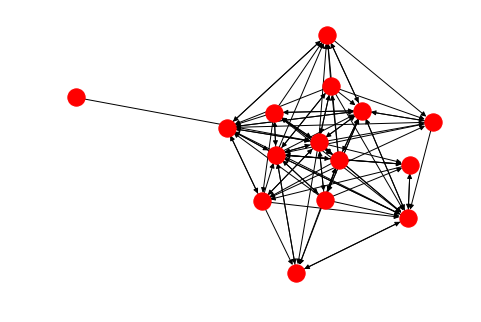

In [8]:
# Let's take the subgraph of P containing this sample
S = P.subgraph(sample)
nx.draw(S)

### Snowball sampling with breadth-first search

Note that this is equivalent to a breadth-first tree search on the graph.

In [9]:
# Let's do a BFS from the source with a depth of 2
sample = nx.bfs_tree(Q, source, depth_limit=2 )

# Let's collect the subgraph
S = P.subgraph(sample)

# Let's confirm that it's the same size
len(sample)

15

## Node and edge samples

Let's try another strategy, just for fun.

1. We will first randomly sample 500 nodes from the graph (reduce the number of nodes).
2. Then, we will randomly sample 500 edges from these nodes (reduce the number of edges).
3. Finally, we will keep only the largest connected component (reduce the number of small isolated components).



In [10]:
# Set the seed for a random number
random.seed(1)

In [11]:
# Step 1 --------------------------------------------------

# Choose a random sample of p's nodes 
random_nodes = random.sample(P.nodes, 500)

# Get the subgraph containing of P these nodes
R = P.subgraph(random_nodes)

print(nx.info(R))

Name: 
Type: DiGraph
Number of nodes: 500
Number of edges: 1947
Average in degree:   3.8940
Average out degree:   3.8940


In [12]:
# Step 2 --------------------------------------------------

# Choose a random sample of p's edges 
random_edges = random.sample(R.edges, 500)

# Get the subgraph containing of P these edges
R = P.edge_subgraph(random_edges)

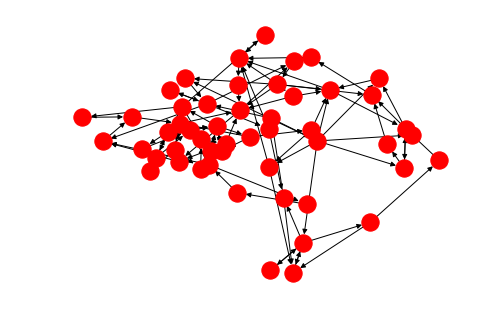

In [13]:
# Step 3 --------------------------------------------------

# Get the biggest connected component
R = max(nx.strongly_connected_component_subgraphs(R), key=len)

nx.draw(R)

# Plotting

<span style="color:green"><b> Exercise: </b>Now, it's time to see what we've got! Before we start, let's practice drawing a graph of our own. Try plotting the following adjacency matrix:  

In [14]:
# Import an example graph that I made
df = pd.read_csv('data/sample_graph.csv', index_col="Unnamed: 0").astype(int)
df

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,1,0,0,0
8,0,0,0,0,1,0,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0


## Graph Layouts

Reference: https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

A basic challenge for plotting networks is how to lay out the nodes and edges.

- One option is to use a **fixed layout** design, such as circular layouts (which put all nodes in a circle) or geographic layouts (which put nodes at their geographic location on a map).


- An alternative is to use an **algorithm** to determine the layout of nodes. Common classes of algorithms are:   

 - **Force-directed layouts:** These algorithms generally balance two forces: a baseline repulsion between all nodes, and a countervailing attraction between connected nodes.
 - **Spectral layouts:** These algorithms perform dimensionality reduction to divide the graph into different clusters.

You might have to experiment a bit to get the layout you want. Let's try it!

### Default (spring) layout

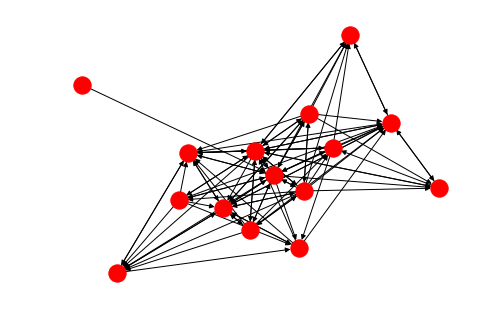

In [15]:
# We start with the default graph. 
nx.draw(S)

### Random layout

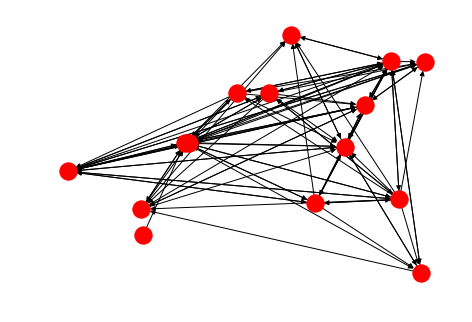

In [16]:
# Actually, it's not bad! If we drew it with a random layout, it would look worse...
nx.draw_random(S)

### Kamada-Kawai (force-directed) layout

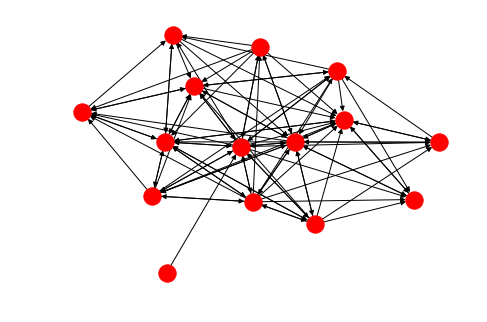

In [17]:
# Maybe there are some other alternatives?
nx.draw_kamada_kawai(S)

### Layouts overview

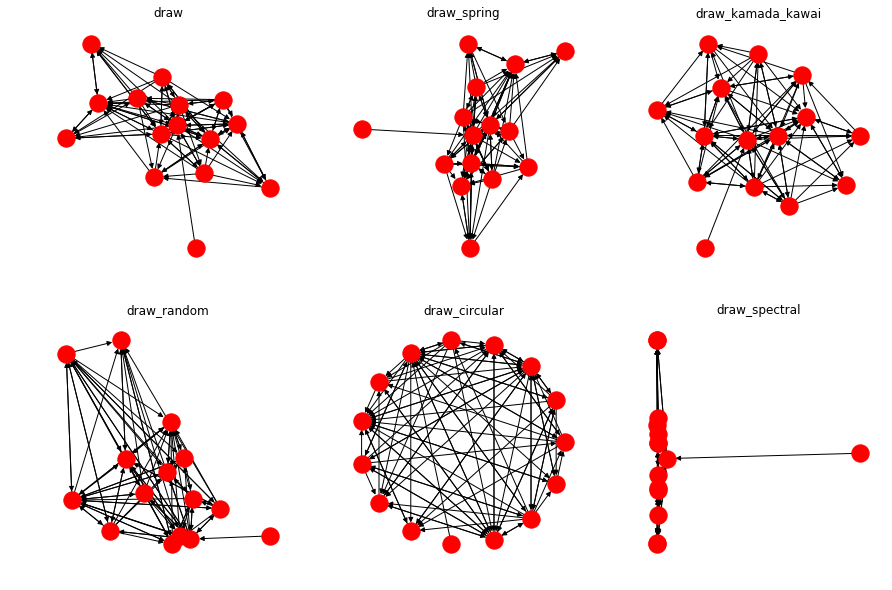

In [18]:
# Here I'll just plot a short summary
fig, ax = plt.subplots(2,3, figsize=[15,10])

ax1,ax2,ax3,ax4,ax5,ax6 = ax[0][0],ax[0][1],ax[0][2],ax[1][0],ax[1][1],ax[1][2]
nx.draw(             S, ax = ax[0][0])
nx.draw_spring(      S, ax = ax[0][1])
nx.draw_kamada_kawai(S, ax = ax[0][2])
nx.draw_random(      S, ax = ax[1][0])
nx.draw_circular(    S, ax = ax[1][1])
nx.draw_spectral(    S, ax = ax[1][2])

ax[0][0].set_title("draw")
ax[0][1].set_title("draw_spring")
ax[0][2].set_title("draw_kamada_kawai")
ax[1][0].set_title("draw_random")
ax[1][1].set_title("draw_circular")
ax[1][2].set_title("draw_spectral")

plt.show()

### Tuning graph layouts

We can also tweak individual algorithms. Before we start with that, though, we need to understand a little bit about NetworkX.

- Above, we have seen NetworkX's `draw` commands that directly incorporate the desired layout, e.g. `draw_spring`.

- However, we can also plot graphs with a given layout in two steps:
  1. Request the layout positions.
  2. Pass the layout positions to the `draw` command.
  
To tweak the positions, you'll need to read the documentation to see what parameters are available to you. For example, let's look into the [spring_layout](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html).

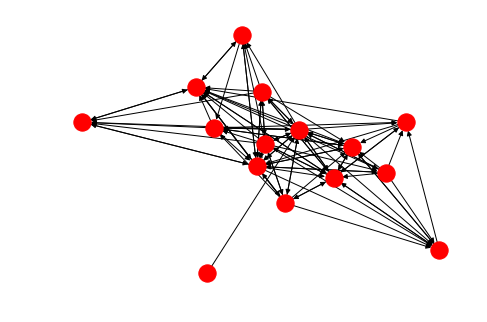

In [19]:
# To tweak the layout, we'll need to work in two steps
pos = nx.spring_layout(S)        # First, we run the algorithm to get the positions
nx.draw(S, pos=pos)              # Next, we plot the graph using those positions

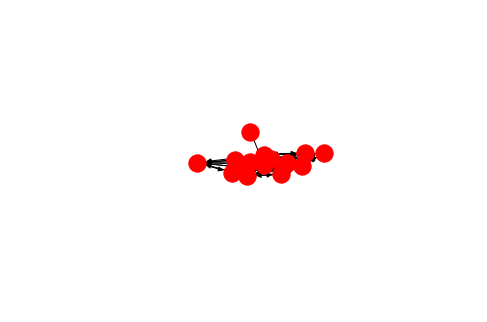

In [20]:
# For example, we can scale it down in size ...
pos = nx.spring_layout(S, scale=0.01)
nx.draw(S, pos=pos)    

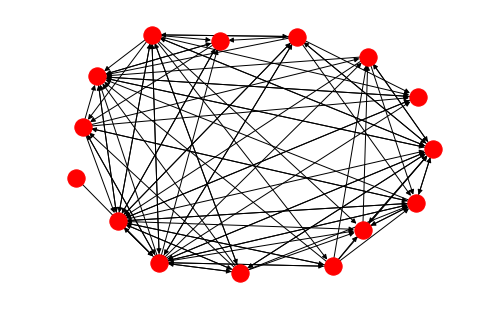

In [21]:
# ... we can push nodes apart ...
pos = nx.spring_layout(S, k=5)
nx.draw(S, pos=pos)    

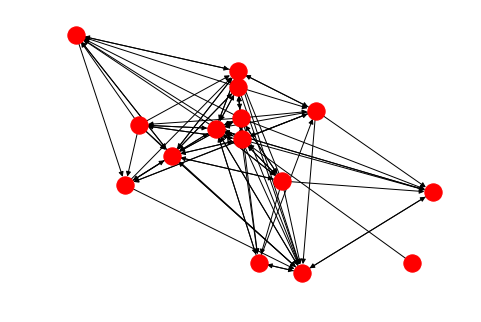

In [22]:
# ...or pull them together
pos = nx.spring_layout(S, k=0.01)
nx.draw(S, pos=pos)    

## Styling the plot aesthetic

For now, let's stick with the default Kamada-Kawai layout. We will set this one time and then use it subsequently below.

In [23]:
# Set the positions for the rest of this section
pos = nx.kamada_kawai_layout(S)

### Plotting the default

Below, we can see the default plot that we've grown used to generating. But now, it takes the `pos` argument which determines the node positions.

We can pass other arguments to the command to change other aspects of the graph styling:

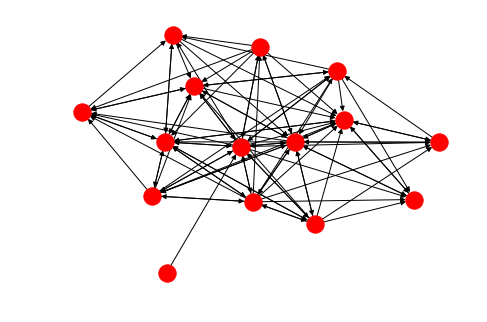

In [24]:
# Draw the default
nx.draw(S, pos=pos)

### Change sizes of nodes, edges, or arrows

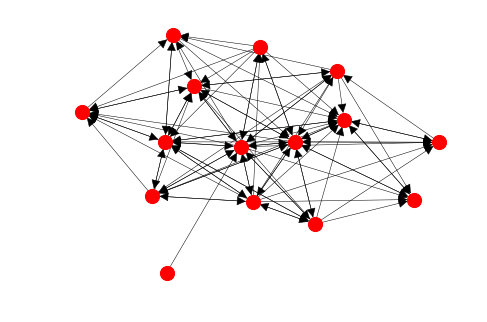

In [25]:
nx.draw(S, pos=pos,
        node_size=200,       # Change size of node
        width=0.5,           # Change width of edge
        arrowsize=20         # Change size of arrow
       )

### Change colors of nodes or edges




<img src="https://matplotlib.org/2.0.0/_images/named_colors.png" style="width: 500px;"/>

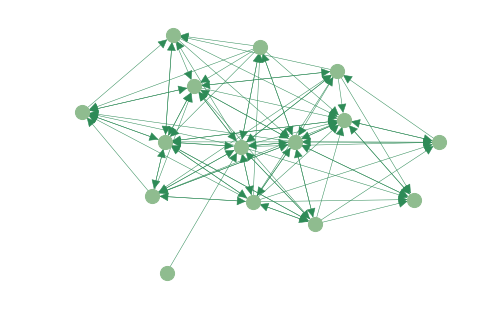

In [26]:
nx.draw(S,  pos=pos,
        node_size=200, 
        width=0.5,
        arrowsize=20,
# -----------------------
        node_color="darkseagreen",
        edge_color='seagreen'
       )

### Change styling of nodes or arrows

<img src="https://matplotlib.org/_images/fancyarrow_demo2.png" style="width: 300px;"/>
<img src="https://matplotlib.org/_images/sphx_glr_marker_reference_002.png" style="width: 500px;"/>

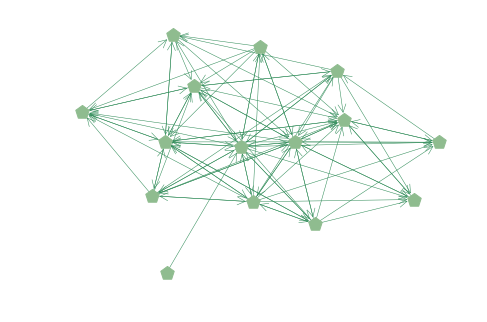

In [27]:
nx.draw(S, pos=pos,
        node_size=200, 
        width=0.5,
        arrowsize=20,
        node_color="darkseagreen",
        edge_color='seagreen',
# -----------------------
        node_shape='p', 
        arrowstyle='->'
       )

### Turn plot features on and off

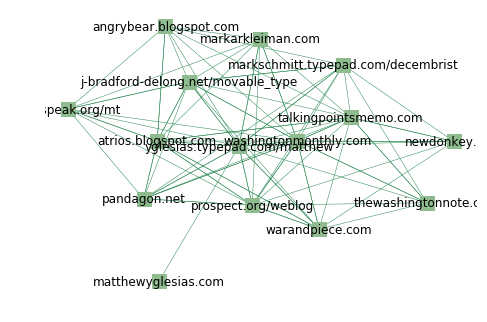

In [28]:
nx.draw(S, pos=pos,
        node_size=200, 
        width=0.5,
        node_color="darkseagreen",
        edge_color='seagreen',
        node_shape='s', 
# -----------------------
        arrows=False,          # Control whether arrow is shown
        with_labels=True       # Control whether plot is labeled
       )

### Adding text

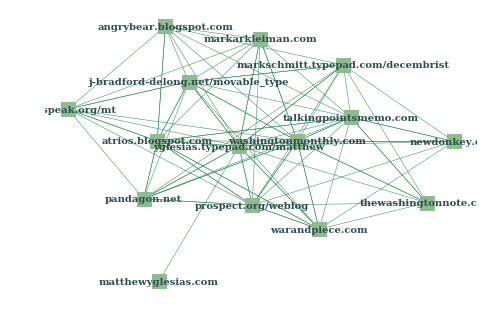

In [29]:
nx.draw(S, pos=pos,
        node_size=200, 
        width=0.5,
        node_color="darkseagreen",
        edge_color='seagreen',
        node_shape='s', 
        arrows=False,
        with_labels=True,
# -----------------------
        font_size=10,
        font_color='darkslategrey',
        font_weight='bold',
        font_family='serif'
       )


## Drawing attention to selected features

Now, we'll show how you can select and emphasize certain features. For example, you might want to tell a story about a given node.

Essentially, the easiest way to do this is:

1. Get the positions of the graph layout.
2. Plot the underlying graph and nodes.
3. Layer your styling on top.

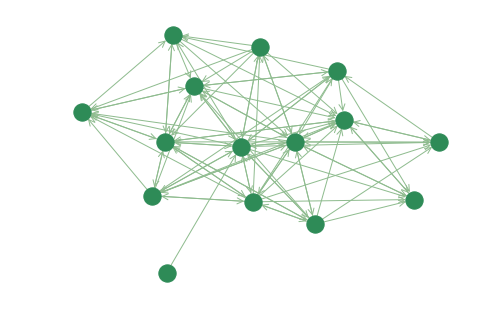

In [30]:
# Let's start with a simple baseline graph
nx.draw(S, pos=pos,
        node_size=300, 
        node_color="seagreen",
        edge_color='darkseagreen',
        arrowstyle='->',
        arrowsize=15
       )

### Drawing selected nodes

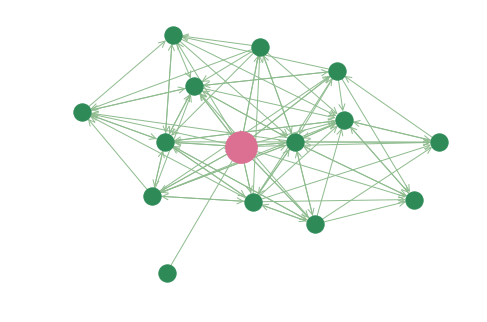

In [31]:
# Let's plot the underlying graph
nx.draw(S, pos=pos,
        node_size=300, 
        node_color="seagreen",
        edge_color='darkseagreen',
        arrowstyle='->',
        arrowsize=15
       )

# ------------------------------------------------------
# We can choose a list of nodes we want to emphasize (in this case, one of Matt Yglesias' pages)
selected_nodes = ['yglesias.typepad.com/matthew']

# Let's resize and recolor the node(s) of interest
nx.draw_networkx_nodes(S, pos=pos,
                      nodelist=selected_nodes,         # List of nodes to alter with new styling
                      node_color = 'palevioletred',
                      node_size=1000)

### Drawing selected node labels

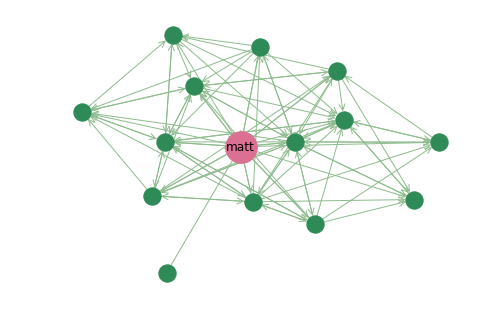

In [32]:
# Let's plot the underlying graph
nx.draw(S, pos=pos,
        node_size=300, 
        node_color="seagreen",
        edge_color='darkseagreen',
        arrowstyle='->',
        arrowsize=15
       )

# We can choose a list of nodes we want to emphasize (in this case, one of Matt Yglesias' pages)
selected_nodes = ['yglesias.typepad.com/matthew']

# Let's resize and recolor the node(s) of interest
nx.draw_networkx_nodes(S, pos=pos,
                      nodelist=selected_nodes,         # List of nodes to alter with new styling
                      node_color = 'palevioletred',
                      node_size=1000)
# ------------------------------------------------------

# We can create a dictionary of nodes to label, and the labels we want
selected_labels = {'yglesias.typepad.com/matthew': "matt"}

# Let's add these labels
nx.draw_networkx_labels(S, pos=pos,
                        labels=selected_labels,       # Dictionary of nodes to label
                        font_size=12)

plt.show()

### Drawing selected edges

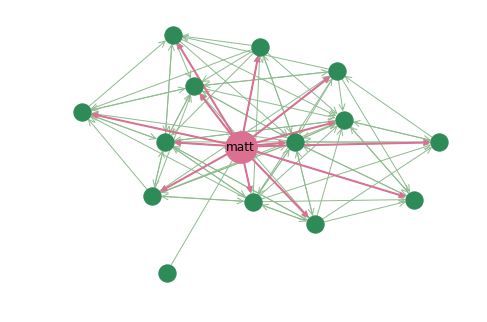

In [33]:
# Let's plot the underlying graph
nx.draw(S, pos=pos,
        node_size=300, 
        node_color="seagreen",
        edge_color='darkseagreen',
        arrowstyle='->',
        arrowsize=15
       )

# We can choose a list of nodes we want to emphasize (in this case, one of Matt Yglesias' pages)
selected_nodes = ['yglesias.typepad.com/matthew']

# Let's resize and recolor the node(s) of interest
nx.draw_networkx_nodes(S, pos=pos,
                      nodelist=selected_nodes,         # List of nodes to alter with new styling
                      node_color = 'palevioletred',
                      node_size=1000)

# We can create a dictionary of nodes to label, and the labels we want
selected_labels = {'yglesias.typepad.com/matthew': "matt"}

# Let's add these labels
nx.draw_networkx_labels(S, pos=pos,
                        labels=selected_labels,       # Dictionary of nodes to label
                        font_size=12)


# ------------------------------------------------------
# We can create a list of edges we want to plot <- in this case, all of Matt's
selected_edges = list(S.edges(['yglesias.typepad.com/matthew']))

# We can plot only these edges
nx.draw_networkx_edges(S, pos=pos,
                      edgelist=selected_edges,        # List of edges to restyle
                      edge_color = 'palevioletred',
                      width=2)

plt.show()

### Drawing selected edge labels

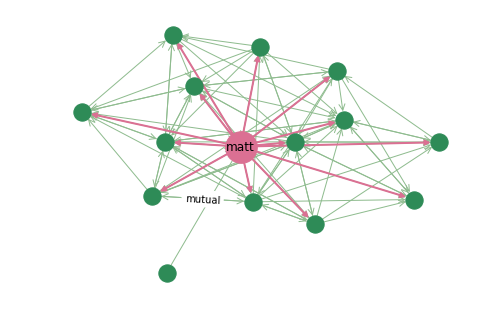

In [34]:
# Let's plot the underlying graph
nx.draw(S, pos=pos,
        node_size=300, 
        node_color="seagreen",
        edge_color='darkseagreen',
        arrowstyle='->',
        arrowsize=15
       )

# We can choose a list of nodes we want to emphasize (in this case, one of Matt Yglesias' pages)
selected_nodes = ['yglesias.typepad.com/matthew']

# Let's resize and recolor the node(s) of interest
nx.draw_networkx_nodes(S, pos=pos,
                      nodelist=selected_nodes,         # List of nodes to alter with new styling
                      node_color = 'palevioletred',
                      node_size=1000)

# We can create a dictionary of nodes to label, and the labels we want
selected_labels = {'yglesias.typepad.com/matthew': "matt"}

# Let's add these labels
nx.draw_networkx_labels(S, pos=pos,
                        labels=selected_labels,       # Dictionary of nodes to label
                        font_size=12)


# We can create a list of edges we want to plot <- in this case, all of Matt's
selected_edges = list(S.edges(['yglesias.typepad.com/matthew']))

# We can plot only these edges
nx.draw_networkx_edges(S, pos=pos,
                      edgelist=selected_edges,        # List of edges to restyle
                      edge_color = 'palevioletred',
                      width=2)

# ------------------------------------------------------
# We can create a dictionary of edges we want to label, and their labels
selected_edge_labels = {("pandagon.net", "prospect.org/weblog"): "mutual"}

nx.draw_networkx_edge_labels(S, pos=pos,
                              edge_labels = selected_edge_labels) # Dictionary of edges to label

plt.show()

## Illustrating discrete attributes

Of course, we might want to systematically render attributes of our graph. 
For example, in our dataset, there is an attribute called "value", which is set to 0 if the blog is liberal and 1 if it is conservative.

Let's drop Matt's blog network and switch back to the sample we previously made, R.

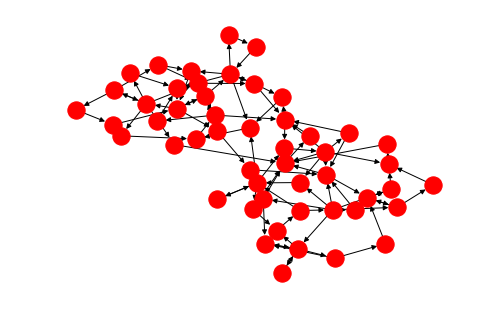

In [35]:
# We'll plot R with the default Kamada Kawai layout
pos = nx.kamada_kawai_layout(R)
nx.draw(R, pos=pos)

<span style="color:green">
<b> Exercise: </b>
    Let's tidy up the graph a bit. How would you...   
    
- make the size of the nodes to be 100
- make the color of the edges to be grey
- make the style of arrows to be a "v" instead of a triangle?

**Answer**:
<span style='color:white'>
pos = nx.kamada_kawai_layout(R)
nx.draw(R, pos=pos, 
        node_size=100,
        edge_color='gray',
        arrowstyle="->")

### Coloring nodes by label

Let's highlight groups of nodes by changing the label color.

In [36]:
# We can see that each node has an attribute caleld "value" with political affiliation
# It also has information about the source of the blog
R.nodes.data()

NodeDataView({'althippo.blogspot.com': {'value': 0, 'source': 'Blogarama'}, 'redstate.org': {'value': 1, 'source': 'CampaignLine'}, 'chrenkoff.blogspot.com': {'value': 1, 'source': 'LabeledManually'}, 'politicalstrategy.org': {'value': 0, 'source': 'CampaignLine'}, 'demagogue.blogspot.com': {'value': 0, 'source': 'LeftyDirectory,eTalkingHead'}, 'papadoc.net/pinkflamingobar.html': {'value': 1, 'source': 'eTalkingHead'}, 'texasbug.blogspot.com': {'value': 1, 'source': 'Blogarama'}, 'janegalt.net': {'value': 1, 'source': 'LabeledManually'}, 'crookedtimber.org': {'value': 0, 'source': 'LeftyDirectory'}, 'xnerg.blogspot.com': {'value': 0, 'source': 'LeftyDirectory,eTalkingHead'}, 'cayankee.blogs.com': {'value': 1, 'source': 'BlogPulse'}, 'williamwebbdotorg.blogspot.com': {'value': 1, 'source': 'eTalkingHead'}, 'john.hoke.org': {'value': 0, 'source': 'BlogCatalog'}, 'tristero.blogspot.com': {'value': 0, 'source': 'Blogarama,LeftyDirectory'}, 'nathannewman.org/log': {'value': 0, 'source': 'Le

In [37]:
# Let's extract political affiliation as a dictionary
political_affil = nx.get_node_attributes(R, 'value')
political_affil

{'aboutpolitics.blogspot.com': 0,
 'alphapatriot.com': 1,
 'althippo.blogspot.com': 0,
 'americablog.blogspot.com': 0,
 'answerguy.blogspot.com': 0,
 'brainshavings.com': 1,
 'cayankee.blogs.com': 1,
 'cbcbcbcb.blogspot.com': 1,
 'chrenkoff.blogspot.com': 1,
 'commonsenserunswild.typepad.com': 1,
 'conservativezone.blogspot.com': 1,
 'crookedtimber.org': 0,
 'demagogue.blogspot.com': 0,
 'dneiwert.blogspot.com': 0,
 'evangelicaloutpost.com': 1,
 'gevkaffeegal.typepad.com/the_alliance': 1,
 'hillcountryviews.blogspot.com': 1,
 'iddybud.blogspot.com': 0,
 'inthebullpen.com': 1,
 'janegalt.net': 1,
 'john.hoke.org': 0,
 'jquinton.com': 1,
 'liberaloasis.com': 0,
 'mahablog.com': 0,
 'mediajunkie.com/edgewise': 0,
 'mhking.mu.nu': 1,
 'mudvillegazette.com': 1,
 'nathannewman.org/log': 0,
 'okieonthelam.com': 1,
 'papadoc.net/pinkflamingobar.html': 1,
 'patriotboy.blogspot.com': 0,
 'patterico.com': 1,
 'politicalstrategy.org': 0,
 'powerlineblog.com': 1,
 'professorbainbridge.com': 1,
 're

In [38]:
# Let's make a list of node_ids and an empty list of node colors
node_ids = list(R.nodes)
node_colors = []

# Now, for each node, get its affiliation
for n in node_ids:                    
    if political_affil[n] == 0:       # 0 = liberal, let's color it blue
        node_colors.append("blue")
    elif political_affil[n] == 1:     # 1 = conservative, let's color it red
        node_colors.append("red")

# Let's inspect
print(node_ids[:10])
print(node_colors[:10])

['althippo.blogspot.com', 'redstate.org', 'chrenkoff.blogspot.com', 'politicalstrategy.org', 'demagogue.blogspot.com', 'papadoc.net/pinkflamingobar.html', 'texasbug.blogspot.com', 'janegalt.net', 'crookedtimber.org', 'xnerg.blogspot.com']
['blue', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue']


In [39]:
# There is a one-line alternative: 
# node_colors = ["blue" if political_affil[n]==0 else "red" for n in node_ids]

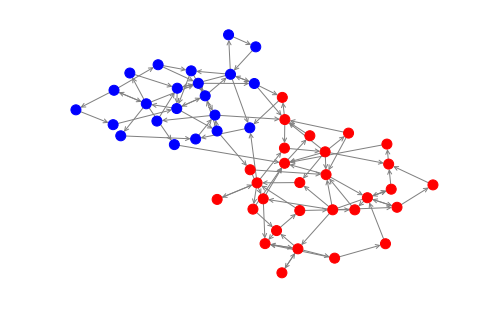

In [40]:
nx.draw(R, pos=pos, 
        node_size=100,
        edge_color='gray',
        arrowstyle="->", fontsize=7, 
        # -------------------------
        nodelist = node_ids,      # Now we just supply the ids
        node_color = node_colors  # And the list of colors corresponding to them
       )

### Coloring edges by node label

Now, let's try to replicate Adamic and Glance's classic figure on our graph subset. We want to use the same intuition: make a list of edges, and then color the edges.
<img src="https://raw.githubusercontent.com/khof312/networks_tutorial/master/figures/adamic_fig1.PNG" style="width: 500px;"/>

In [41]:
# Let's make a list of edge_ids and an empty list of edge colors
edge_ids = list(R.edges)
edge_colors = []

for e in edge_ids:
    
    n1,n2 = e

    # Liberal links to liberal
    if political_affil[n1] == 0 and political_affil[n2] == 0:
        edge_colors.append("steelblue")
    
    # Conservative links to conservative
    elif political_affil[n1] == 1 and political_affil[n2] == 1:
        edge_colors.append("lightcoral")
   
    # Links across parties
    elif political_affil[n1] != political_affil[n2]:
        edge_colors.append("orange")

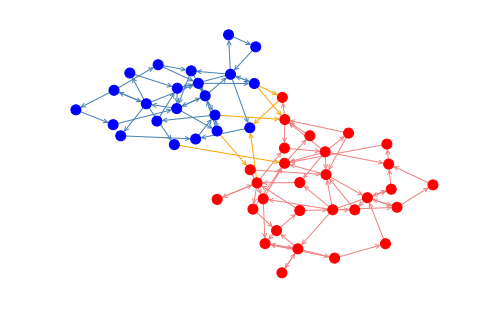

In [42]:
nx.draw(R, pos=pos, 
        node_size=100,
        arrowstyle="->", fontsize=7, 
        nodelist = node_ids,
        node_color = node_colors,
        # -------------------------
        edgelist = edge_ids,          # Now we just supply the edge ids
        edge_color = edge_colors      # and the list of colors corresponding to them
       )

<span style="color:green">
<b> Exercise: </b>
   We almost replicated the graph, but not exactly. We use orange links to represent any cross-party ties, but in Adamic and Glance, the orange links only go from liberal to conservative. They use purple links to indicate the opposite direction. How would we modify the code to match their coloring scheme?

**Answer**: 
<span style="color:white">
edge_ids = list(R.edges) # Let's make a list of edge_ids and an empty list of edge colors
edge_colors = []
for e in edge_ids:
    n1,n2 = e
    if political_affil[n1] == 0 and political_affil[n2] == 0:
        edge_colors.append("steelblue")     # Liberal links to liberal
    elif political_affil[n1] == 1 and political_affil[n2] == 1:
        edge_colors.append("lightcoral")    # Conservative links to conservative
    elif political_affil[n1] == 0 and political_affil[n2] == 1:
        edge_colors.append("orange")        # Liberal to conservative
    elif political_affil[n1] == 1 and political_affil[n2] == 0:
        edge_colors.append("purple")        # Conservative to liberal
nx.draw(R, pos=pos, 
        node_size=100,
        arrowstyle="->", fontsize=7, 
        nodelist = node_ids,
        node_color = node_colors,
        edgelist = edge_ids,          # Now we just supply the edge ids
        edge_color = edge_colors      # and the list of colors corresponding to them
       )

## Illustrating continuous attributes

We can also use size to inform us about relevant quantities in the graph. For example, we might want to make important nodes larger, or plot the weights on edges.

### Sizing nodes by value

<span style="color:orange">
<i> Note: </i>
When sizing nodes by value, it sometimes helps to scale the value in order to draw a more dramatic contrast. We can do this by multiplying the raw value or exponentiating. You can experiment with the scaling constants until you get the appearance you want.

#### Degree

In [43]:
# Let's make a list of node_ids and an empty list of node sizes
node_ids = list(R.nodes)
node_sizes = []

# Add the scaled degrees for each node
for n in node_ids:
    node_sizes.append((2*R.degree(n))**1.75)   # Experiment with scaling here

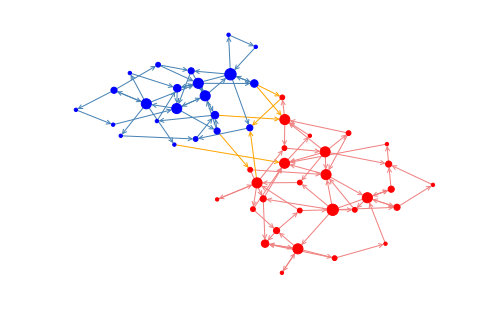

In [44]:
# Plot
nx.draw(R, pos=pos, 
        node_size=node_sizes,                  # Supply a list of node sizes
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_colors,
        edgelist = edge_ids,
        edge_color = edge_colors,
        nodelist = node_ids
       )

#### Pagerank

We can use the same general formula for any calculated value. For example, we can size nodes by PageRank:

In [45]:
# Get a dictionary of page ranks
pr = nx.pagerank(R)

# Let's make a list of node_ids and an empty list of node sizes
node_ids = list(R.nodes)
node_sizes = []

# Calculate the node sizes
for n in node_ids:
    node_sizes.append(4000*pr[n])              # Pagerank values are small (they sum to 1), so we scale aggressively

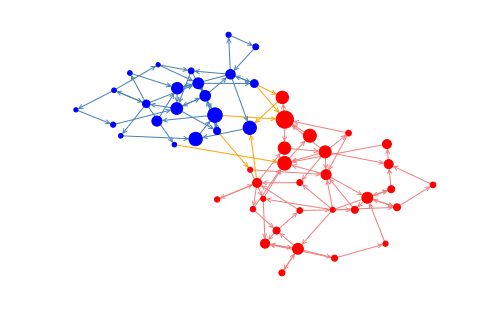

In [46]:
# Plot
nx.draw(R, pos=pos, 
        node_size=node_sizes,                  # Supply a list of node sizes
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_colors,
        edgelist = edge_ids,
        edge_color = edge_colors,
        nodelist = node_ids
       )

### Coloring nodes by value


<img src="https://matplotlib.org/1.2.1/_images/show_colormaps.png" style="width: 300px;"/>

We might want to show multiple features. In that case, we can also use color as an informative dimension. Let's keep the node ids and node sizes from above, but add a color dimension that captures in-degree:

In [47]:
# Initialize a list to store the variable associated with the color
node_color_values = []

# Add the (numeric) values to the list
for n in node_ids:
    node_color_values.append(R.in_degree(n))

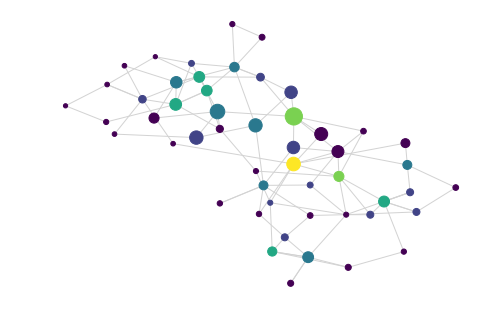

In [48]:
nx.draw(R, pos=pos, 
        node_size=node_sizes,
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_color_values,   # Supply the (numeric) data for the color variable
        cmap = plt.get_cmap('viridis'),   # Map the numeric data to a color scheme
        edgelist = edge_ids,
        edge_color = 'lightgrey',
        nodelist = node_ids,
        arrows=False
       )

<span style="color:orange">
<i> Note: </i> We can see that in-degree does not perfectly correspond with PageRank. The nodes with the highest in degree (the lightest) are not always the ones with the highest PageRank (the biggest). PageRank depends on the weight of inbound links (and not just the number of them).

### Sizing edges by value

Finally, we might want to use weight values to change the edges sizing. Here, let's weight a tie by how many neighbors its endpoints have in common. By now, you can probably guess how to do this:

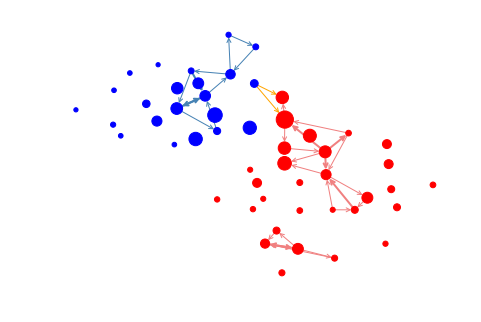

In [49]:
# Initialize a list of edge weights
edge_weights = []

# For each edge, append a weight
for n1,n2 in edge_ids:
    neighbors = nx.common_neighbors(nx.Graph(R),n1,n2)   # Get common neighbors of the end points
    n_neighbors = len(list(neighbors))                   # Count how many of these neighbors they have in common
    edge_weights.append(n_neighbors)                     # Add to the list (+1, in case no common neighbors)

# Plot
nx.draw(R, pos=pos, 
        node_size=node_sizes,
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_colors,
        edgelist = edge_ids,
        edge_color = edge_colors,
        nodelist = node_ids,
        width=edge_weights,                              # Supply the edge weights
        edge_labels = [str(i) for i in edge_weights]
       )

<span style="color:green"><b> Exercise: </b>
Why are some edges missing? How would you fix the code so that even edges with no common neighbors are drawn? </span>

**Answer**: <span style="color:white">
edge_weights = []
for n1,n2 in edge_ids:
    neighbors = nx.common_neighbors(nx.Graph(R),n1,n2)   # Get common neighbors of the end points
    n_neighbors = len(list(neighbors))                   # Count how many of these neighbors they have in common
    edge_weights.append(1+n_neighbors)                     # Add to the list (+1, in case no common neighbors)
nx.draw(R, pos=pos, 
        node_size=node_sizes,
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_colors,
        edgelist = edge_ids,
        edge_color = edge_colors,
        nodelist = node_ids,
        width=edge_weights,                              # Supply the edge weights
        edge_labels = [str(i) for i in edge_weights]
       )

<span style="color:green">
<b> Exercise: </b>How would you change the code so that random weights are drawn?

_Note_ You can draw random numbers between zero and one using `random.random()`.

**Answer**: <span style="color:white">
edge_weights = []
for e in edge_ids:
    edge_weights.append(2*random.random())                 # Add a random weight
nx.draw(R, pos=pos, 
        node_size=node_sizes,
        arrowstyle="->", 
        fontsize=7, 
        node_color = node_colors,
        edgelist = edge_ids,
        edge_color = edge_colors,
        nodelist = node_ids,
        width=edge_weights,                              # Supply the edge weights
        edge_labels = [str(i) for i in edge_weights]
       )

### Degree histogram

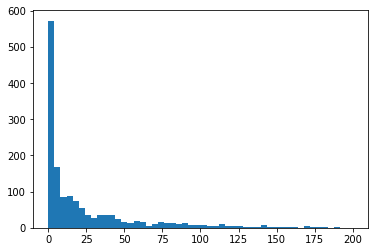

In [50]:
# Get a list of all degrees
degrees = list(dict(P.degree()).values())

# Plot a histogram of the degree distribution
plt.hist(degrees, bins=50, range = [0,200])
plt.show()

Today we have focused on simple network visualization charts, which are an easy and intuitve way to visualize and explore networks. However, it's worth noting that there are many different options.

- **Sankey diagrams** are good for visualizing bipartite networks, such as [this visualization of European asylum-seekers](http://graphics.thomsonreuters.com/15/migrants/index.html#section-asylum):

<img src="http://graphics.thomsonreuters.com/15/migrants/img/asylum_sankey.png" style="width: 600px;"/>

- **Chord charts** are helpful for visualizing flows, such as [this graphic on illegal wildlife trading](https://www.wired.com/2015/06/using-news-reports-track-wildlife-black-markets/):

<img src="https://media.wired.com/photos/593243af44db296121d69fca/master/w_582,c_limit/illegal-wildlife1.jpg" style="width: 600px;"/>

- **Trees** and dendrograms can be used for hierarchical data, such as [this illustration of Crayola crayon color evolution in time](https://blog.revolutionanalytics.com/2010/01/crayola-crayon-colors-1949present.html):

<img src="https://revolution-computing.typepad.com/.a/6a010534b1db25970b01287729d4b6970c-pi" style="width: 600px;"/>
    

- **Arc Diagrams** can help with linearly sequenced data, such as [these networks of biblical and religious references](https://www.theguardian.com/news/datablog/gallery/2013/sep/05/holy-infographics-bible-visualised):

<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2013/9/5/1378376157031/all_books.png?width=1010&quality=85&auto=format&fit=max&s=63bb4c7e6ed30fd2f47078fbc86425a1" style="width: 600px;"/>

<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2013/9/5/1378376358957/Cross_ref.png?width=1920&quality=85&auto=format&fit=max&s=47026ee5cd5f0798db7955f2e37c8020" style="width: 600px;"/>


- **Similarity matrices** can help to highlight clustering in densely connected networks: 
<img src="figures/citywide_mobility.png" style="width: 700px;"/>

More examples: 
- https://python-graph-gallery.com
- https://flowingdata.com/category/visualization/network-visualization/

The right visualization depends on the type of data you have, how much of it there is, and the key messages you want to highlight.